# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kidal
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | wailua homesteads
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | udachny
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | balangir
Processing Record 12 of Set 1 | sao joao da barra
Processing Record 13 of Set 1 | petropavlovsk-kamchatsky
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | bari
Processing Record 16 of Set 1 | al mindak
Processing Record 17 of Set 1 | erenhot
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | iskateley
Processing Record 21 of Set 1 | grytviken
Processing Record 22

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kidal,18.4411,1.4078,30.48,9,2,5.00,ML,1715234145
1,port elizabeth,-33.9180,25.5701,18.16,82,100,1.54,ZA,1715234146
2,tiksi,71.6872,128.8694,-1.03,82,85,2.76,RU,1715234147
3,west island,-12.1568,96.8225,29.99,70,22,6.17,CC,1715234148
4,wailua homesteads,22.0669,-159.3780,25.24,83,100,4.63,US,1715234148


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kidal,18.4411,1.4078,30.48,9,2,5.00,ML,1715234145
1,port elizabeth,-33.9180,25.5701,18.16,82,100,1.54,ZA,1715234146
2,tiksi,71.6872,128.8694,-1.03,82,85,2.76,RU,1715234147
3,west island,-12.1568,96.8225,29.99,70,22,6.17,CC,1715234148
4,wailua homesteads,22.0669,-159.3780,25.24,83,100,4.63,US,1715234148


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

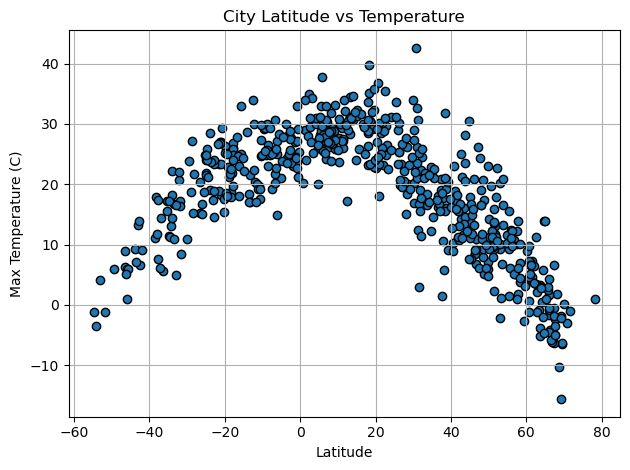

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=1, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Temperature")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

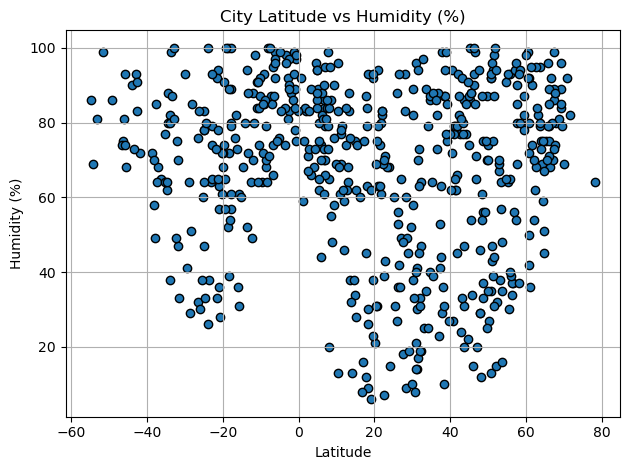

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=1, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%)")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

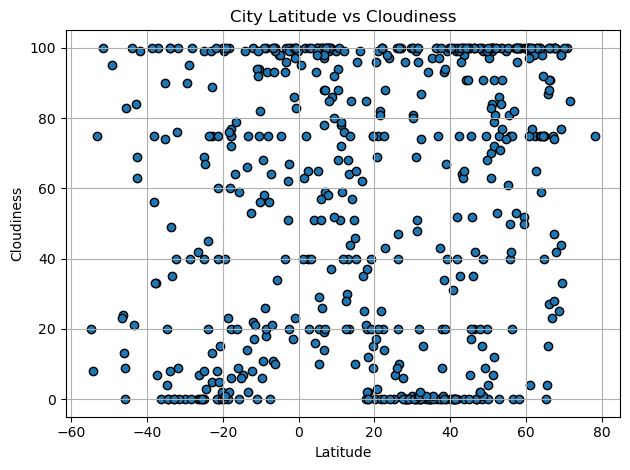

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=1, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

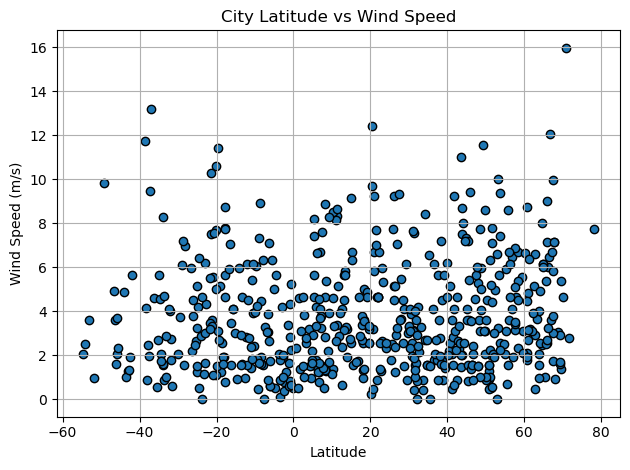

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=1, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) >=0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kidal,18.4411,1.4078,30.48,9,2,5.00,ML,1715234145
2,tiksi,71.6872,128.8694,-1.03,82,85,2.76,RU,1715234147
4,wailua homesteads,22.0669,-159.3780,25.24,83,100,4.63,US,1715234148
6,udachny,66.4167,112.4000,-4.20,68,91,6.48,RU,1715234150
9,balangir,20.7167,83.4833,36.75,31,69,3.20,IN,1715234152


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) <0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port elizabeth,-33.9180,25.5701,18.16,82,100,1.54,ZA,1715234146
3,west island,-12.1568,96.8225,29.99,70,22,6.17,CC,1715234148
5,adamstown,-25.0660,-130.1015,21.79,78,69,3.22,PN,1715234149
7,avarua,-21.2078,-159.7750,27.03,94,40,3.60,CK,1715234150
8,invercargill,-46.4000,168.3500,8.90,75,24,3.58,NZ,1715234151


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8707549440420547


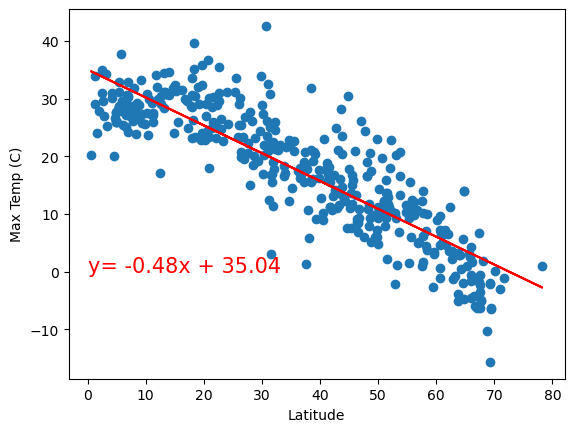

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,0), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print(f"The r-value is {rvalue}")

The r-value is 0.7868185081253489


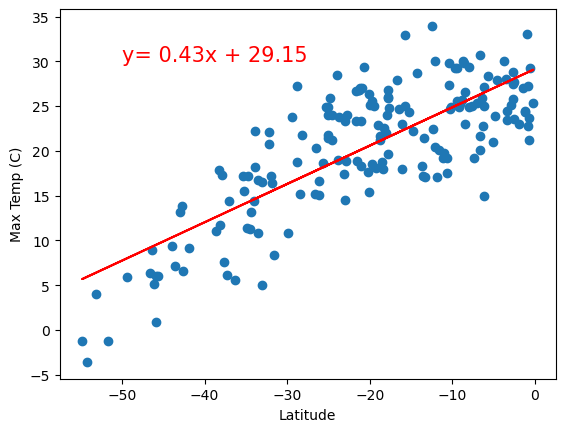

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-50,30), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print(f"The r-value is {rvalue}")

**Discussion about the linear relationship:**
In the Northern Hemisphere, the correlation coefficient, "r" is -0.83. This means there is a strong negative relationship between Latitude and Max Temperature; the further we get from the equator the lower the maximum temperature will be.

In the Southern Hemisphere, the correlation coefficient, "r" is 0.80, suggesting that there is a strong positive relationship between Latitude and Max Temperature; meaning the closer we travel to the equator the higher the maximum temperature will be.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.08035306649691089


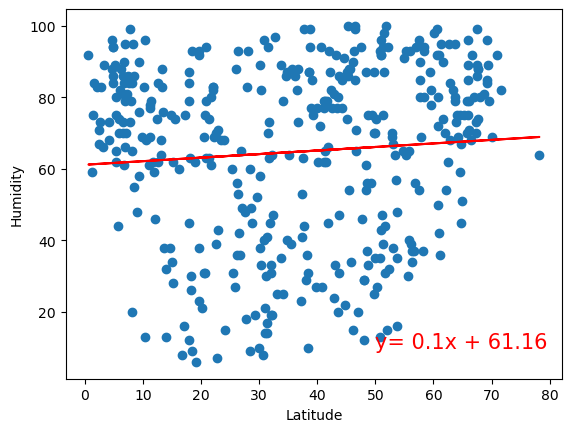

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(50,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is {rvalue}")

The r-value is 0.21686641996022946


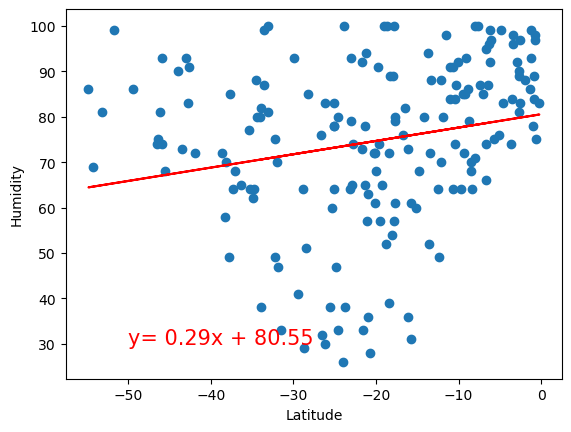

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-50,30), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is {rvalue}")

**Discussion about the linear relationship**:
In the Northern Hemisphere, the correlation coefficient, "r" equals 0.10. This suggests that there is a weak positive relationship between Latitude and Humidity in the Northen Hemisphere. Although there doesn't appear to be any correlation between Latitude and Humidity; the scatter plot looks fairly uniform.

In the Southern Hemisphere, the correlation coefficient, "r" equals 0.04 suggesting that there is a weak positive relationship between Latitude and Humidity. There does not appear to be a correlation between Latitude and Humidity in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.11556391521200599


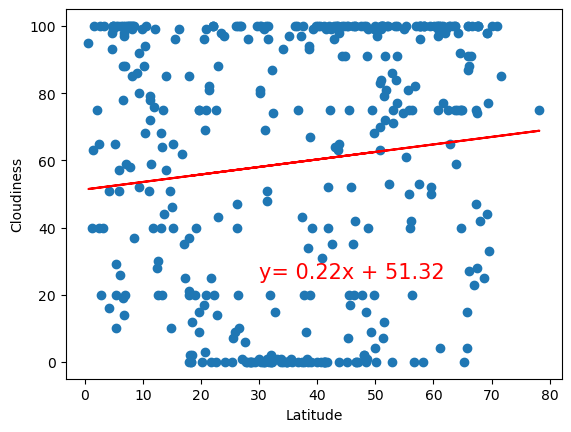

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(30,25), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is {rvalue}")

The r-value is 0.206302446551068


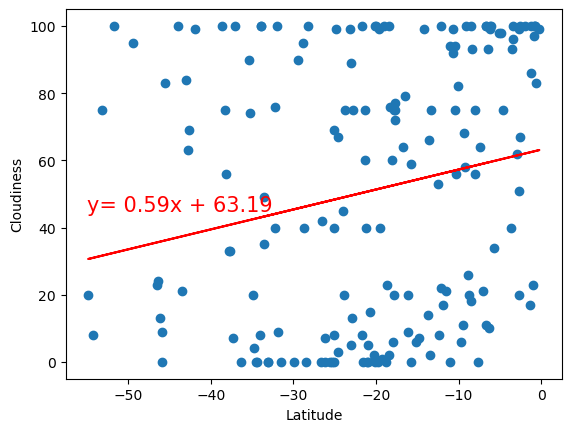

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-55,45), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is {rvalue}")

**Discussion about the linear relationship:** 

In the Northern Hemisphere for the relationship between Latitude and Cloudiness, the correlation coefficent, "r" is 0.01. This suggests that there is a very weak postive relationship between Latitude and Cloudiness in the Northern Hemisphere. According to the scatter plot there does not appear to be any correlation between Latitude and Cloudiness in the Northern Hemisphere.

In the Southern Hemisphere for, the relationship between Latitude and Cloudiness, the correlation coefficient, "r" equals 0.17. This suggests that there is a slight positive relationship between Latitude and Cloudiness in the Southern Hemisphere. The scatter plot appears to show somewhat of the positive relationship: as cities are located closer to the equator the the cloudiness seems to increase.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.11859915205862266


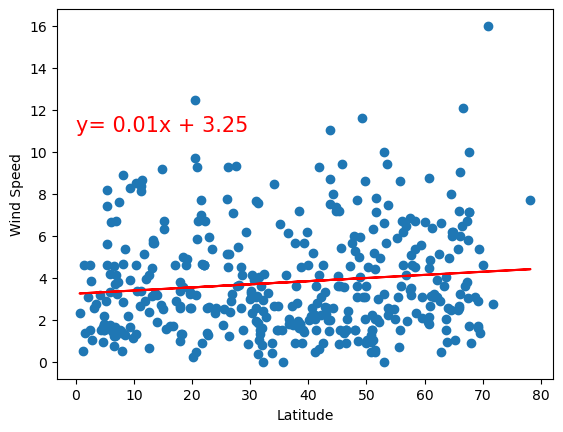

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,11), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is {rvalue}")

The r-value is -0.1280492572854186


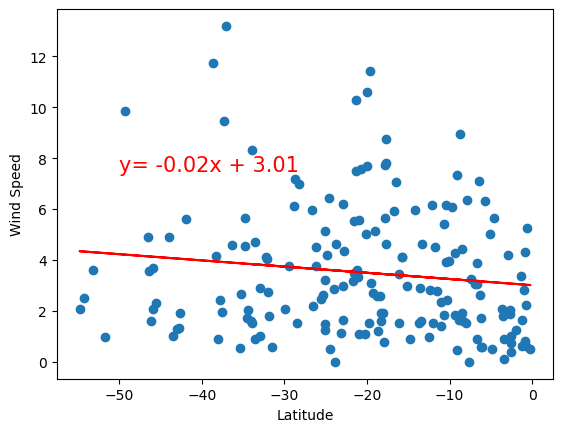

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-50,7.5), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is {rvalue}")

**Discussion about the linear relationship:** 

In the Northern Hemisphere for the relationship between Latitude and Wind Speed, the correlation coefficent, "r" equals 0.16. This suggests there is a slight positive relationship between Latitude and Wind Speed; as cities are located further from the equator there should be an increase in Wind Speed. However the scatter plot appears to not show a correlation between Latitude and Wind Speed.

In the Southern Hemisphere for the relationship between Latitude and Wind Speed, the correlation coefficient, "r" equals -0.04. This suggests that either there would be a slight negative relationship between Latitude and Wind Speed or no relationship between Latitude and Wind Speed. The scatter plot appears to show no correlation between Latitude and Wind Speed in the Southern Hemisphere.